In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

UPLOAD AND READ DATA

In [2]:
data = pd.read_csv('/content/train_loan.csv')
#reading data to python environment

In [3]:
data.head()
#for showing first5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#showing columns of dataset given
data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.shape
#for showing number of rows and columns

(614, 13)

In [6]:
#checking datatypes of each column
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [7]:
# for describing the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


DATA PREPROCESSING


a) Missing value handling


In [8]:
#finding missing values
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


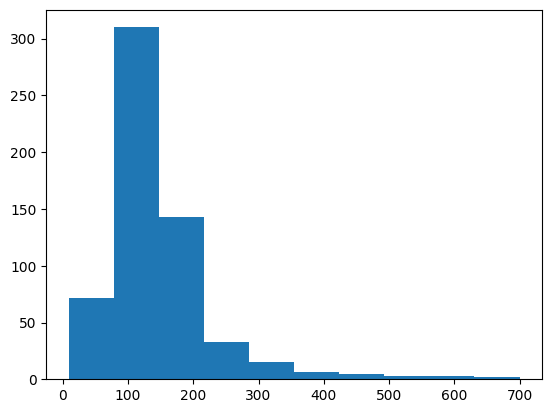

In [10]:
#missing value correction for numerical data using imputation method.
plt.hist(data['LoanAmount'])
plt.show()

In [11]:
#missing values replace with median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

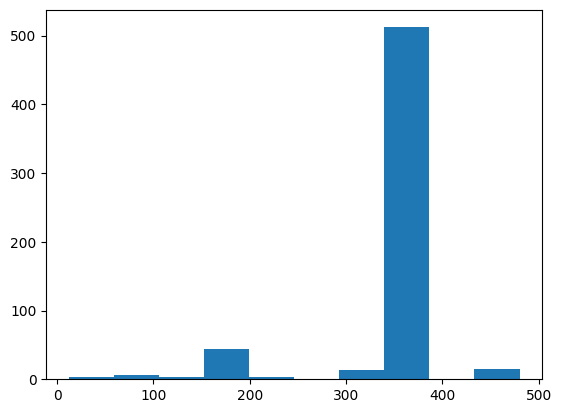

In [12]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

In [13]:
#not normal distribution so that replacing missing values with median
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

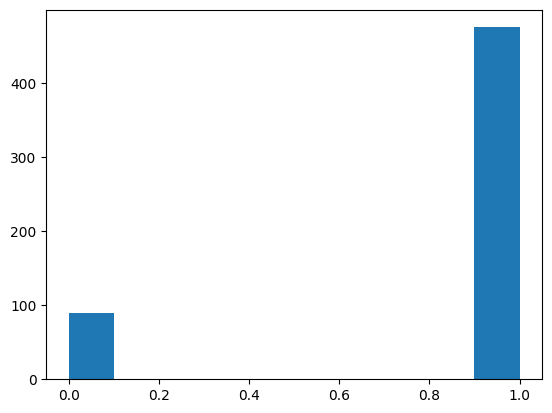

In [14]:
plt.hist(data['Credit_History'])
plt.show()

In [15]:
#replacing missing values of credit history mith median
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [16]:
#imputations have done for object data type
#gender  using mode entering highest occuring gender
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
#for married
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#for dependents
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
# for selfemployed
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [18]:
#ensuring missing values are disappeared
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [19]:
# checking presence of duplicate data
data.duplicated().sum()

0

b) OUTLIER DETECTION

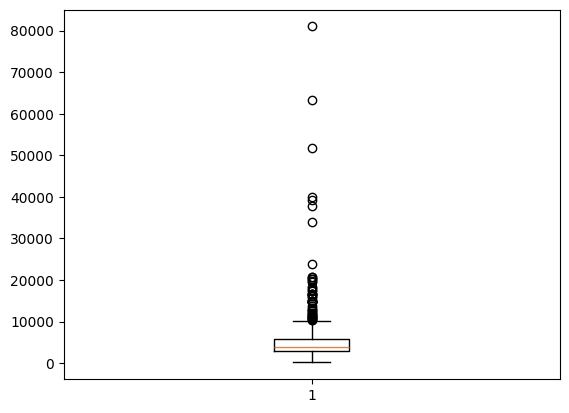

In [20]:
#using boxplot
#outlier detection only for numerical data
#for applicant income
plt.boxplot(data['ApplicantIncome'])
plt.show()

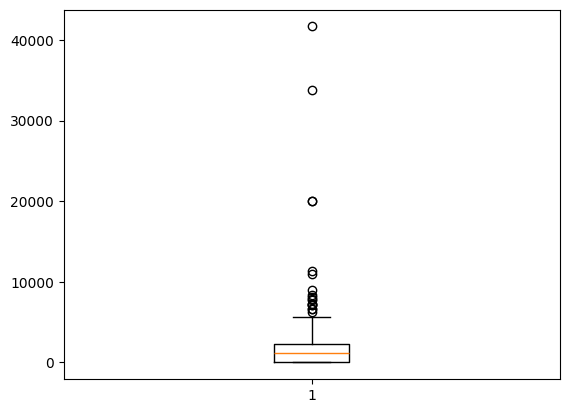

In [21]:
#boxplot for coapplicantincome
plt.boxplot(data['CoapplicantIncome'])
plt.show()

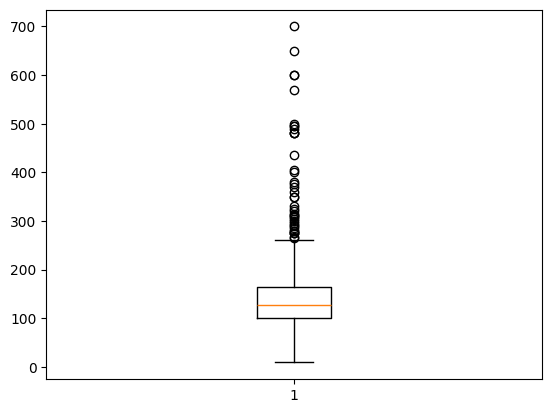

In [22]:
#boxplot for loan amount
plt.boxplot(data['LoanAmount'])
plt.show()

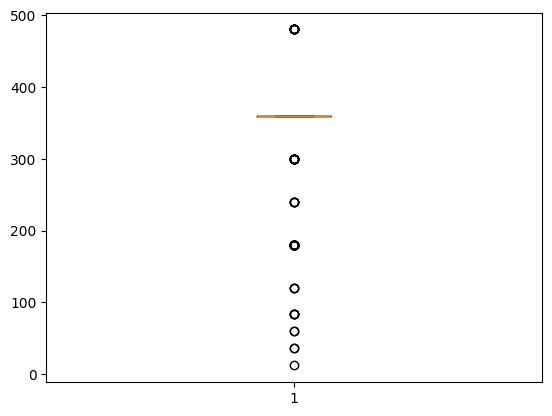

In [23]:
#boxplot for loan amount term
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

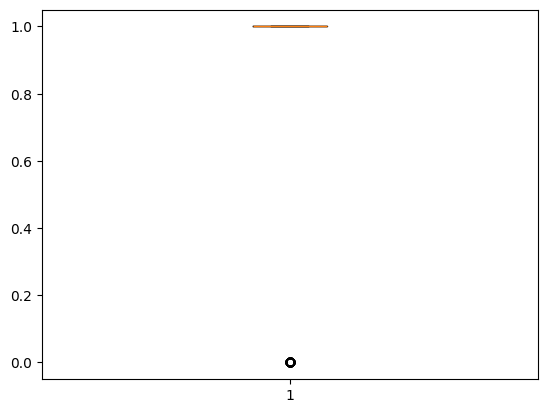

In [24]:
#boxplot for credit history
plt.boxplot(data['Credit_History'])
plt.show()

In [25]:
# for all numrical columns of given data outliers are present

c)ENCODING

In [26]:
#binary encoding for gender male=0,female=1
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
#binary encoding for marrital status
data['Married'] = data['Married'].map({'Yes':1,'No':0})
#binary encoding for dependents
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
#binary encoding for education graduation=1 and no graduation=0
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})
#binary encoding for self employed
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0})
#binary encoding for property area as rural=0,semiurban=1,urban=2
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
#binary encoding for loan status
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})

In [27]:
#label encoding for loan id
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_ID'] = le.fit_transform(data['Loan_ID'])

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
data.dtypes
#ensuring encoding has been completed

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


d)SCALING


In [30]:
#scaling done in data where different ranges of dataset
#Here, applicable in applicant income,coapplicant income and loan amount
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [31]:
# standard scaling for applicant income
data['ApplicantIncome'] = ss.fit_transform(data[['ApplicantIncome']])

In [32]:
# standard scaling for coapplicant income
data['CoapplicantIncome'] = ss.fit_transform(data[['CoapplicantIncome']])

In [33]:
# standard scaling for loan amount
data['LoanAmount'] = ss.fit_transform(data[['LoanAmount']])

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,1,0,0.072991,-0.554487,-0.211241,360.0,1.0,2,1
1,1,0,1,1,1,0,-0.134412,-0.038732,-0.211241,360.0,1.0,0,0
2,2,0,1,0,1,1,-0.393747,-0.554487,-0.948996,360.0,1.0,2,1
3,3,0,1,0,0,0,-0.462062,0.251980,-0.306435,360.0,1.0,2,1
4,4,0,0,0,1,0,0.097728,-0.554487,-0.056551,360.0,1.0,2,1


In [34]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.182410,0.653094,0.744300,0.781759,0.133550,-4.339634e-18,4.050325e-17,-2.603780e-17,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,12.000000,0.000000,0.000000,0.000000
25%,153.250000,0.000000,0.000000,0.000000,1.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,360.000000,1.000000,0.000000,0.000000
50%,306.500000,0.000000,1.000000,0.000000,1.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,360.000000,1.000000,1.000000,1.000000
75%,459.750000,0.000000,1.000000,1.000000,1.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.595146e+00,480.000000,1.000000,2.000000,1.000000
